# Description: 
Develop a machine learning program to identify when an article might be fake news. Run by the UTK Machine Learning     Club.

Fake_news_train :   A full training dataset with the following attributes:

id              :   Unique id for a news article

title           :   The title of a news article

author          :   Author of the news article

text            : the text of the article; could be incomplete

label           : a label that marks the article as potentially unreliable

1               : unreliable

0               : reliable

In [59]:
#importing the required libraries
import pandas as pd
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
#Reading the Dataset
data=pd.read_csv("Fake_news_train.csv")

In [61]:
#checking the Dataset
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [62]:
data.title[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [63]:
#checking the Shape (Rows and Columns)
data.shape

(20800, 5)

In [64]:
#Checking for missing values
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [65]:
#dropping the Missing Value 
data.dropna(inplace=True)

In [66]:
data.shape

(18285, 5)

In [67]:
data.reset_index(inplace=True)

In [68]:
data.text[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [69]:
data.drop(columns=['index','id'],inplace=True)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

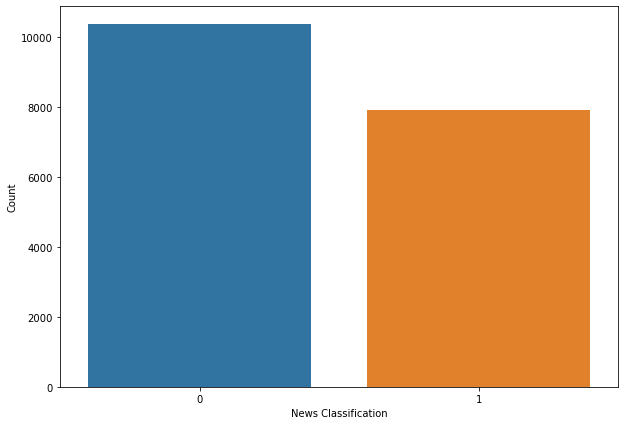

In [71]:
plt.figure(figsize=(10,7))
sns.countplot(x="label",data=data)
plt.xlabel("News Classification")
plt.ylabel("Count")

In [72]:
messages=data.drop(['label'],axis=1)
y=data['label']

In [73]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer


In [74]:
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
    #substitue other character then a to z and A to Z
    review=re.sub('[^a-zA-Z]'," ",messages['title'][i])
    #lowering all the letters 
    review=review.lower()
    review=review.split()
    # checking the all words if they belong to stop wrods or not
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=" ".join(review)
    corpus.append(review)

In [75]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [76]:
#applying CountVectorizer
#creating the Bag of Words
#max_feature= taking max only 5000 words

cv =CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [78]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [79]:
import matplotlib.pyplot as plt


In [80]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")
        
    thres=cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white'if cm[i,j]>thres else "black")
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Table")

# MultiNOminal NB Algorithm

In [81]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [82]:
from sklearn import metrics
import numpy as np
import itertools


accuracy is 90.21%
Confusion Matrix, without Normalization


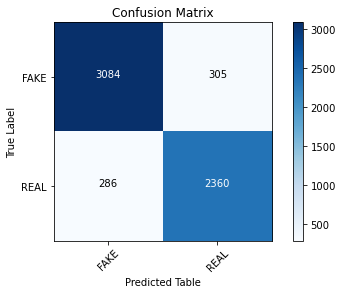

In [92]:
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print("accuracy is {}%".format(round(score*100,2)))
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE',"REAL"])

Multinomial Classifier With HyperParameter

In [94]:
best_score=0
alpha_val=0.0
for i in np.arange(0.1,1.1,0.1):
    sub_classifier=MultinomialNB(alpha=i)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score=metrics.accuracy_score(y_test,y_pred)
    print(" Accuracy Score for Alpha = {} is {} %".format(round(i,2),round(score*100,2)))
    if score > best_score:
        best_score=score
        alpha=i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_score*100, 2), round(alpha,2)))
        
    

 Accuracy Score for Alpha = 0.1 is 90.21 %
 Accuracy Score for Alpha = 0.2 is 90.26 %
 Accuracy Score for Alpha = 0.3 is 90.24 %
 Accuracy Score for Alpha = 0.4 is 90.17 %
 Accuracy Score for Alpha = 0.5 is 90.16 %
 Accuracy Score for Alpha = 0.6 is 90.22 %
 Accuracy Score for Alpha = 0.7 is 90.26 %
 Accuracy Score for Alpha = 0.8 is 90.16 %
 Accuracy Score for Alpha = 0.9 is 90.17 %
 Accuracy Score for Alpha = 1.0 is 90.19 %
--------------------------------------------
The best accuracy is 90.26% with alpha value as 0.2


# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [97]:
# Predicting the Test set results
lr_y_pred = lr_classifier.predict(X_test)

In [99]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score = accuracy_score(y_test, lr_y_pred)
print("Accuracy score is: {}%".format(round(score*100,2)))


Accuracy score is: 93.42%


In [100]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)


In [101]:
lr_cm

array([[3077,  312],
       [  85, 2561]])

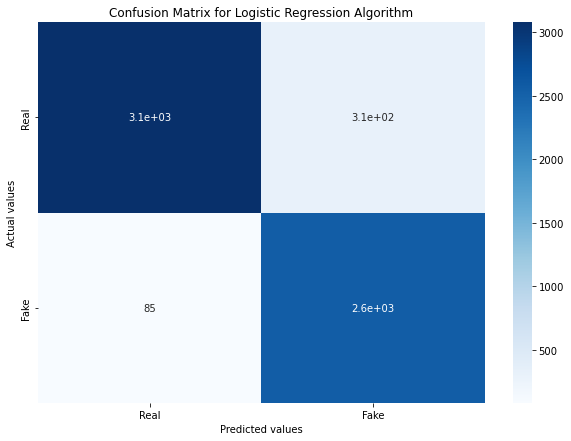

In [103]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [104]:
# Hyperparameter tuning the Logistic Regression Classifier
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1): 
    temp_classifier = LogisticRegression(C=i, random_state=0)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))

Accuracy score for C=0.1 is: 91.91%
Accuracy score for C=0.2 is: 92.61%
Accuracy score for C=0.3 is: 92.96%
Accuracy score for C=0.4 is: 93.04%
Accuracy score for C=0.5 is: 93.29%
Accuracy score for C=0.6 is: 93.32%
Accuracy score for C=0.7 is: 93.31%
Accuracy score for C=0.8 is: 93.32%
Accuracy score for C=0.9 is: 93.41%
Accuracy score for C=1.0 is: 93.42%
--------------------------------------------
The best accuracy is 93.42% with C value as 1.0


In [105]:
classifier = LogisticRegression(C=1.0, random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predictions

In [128]:
def fake_news(sample_news):
    sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
    sample_news = sample_news.lower()
    sample_news_words = sample_news.split()
    sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_news = [ps.stem(word) for word in sample_news_words]
    final_news = ' '.join(final_news)
    temp = cv.transform([final_news]).toarray()
    result= classifier.predict(temp)[0]
    if result ==0:
        fin_result="Fake News"
    elif result==1:
        fin_result="Real News"
    return fin_result

In [129]:
fake_news('hous dem aid even see comey letter jason chaffetz tweet')

'Real News'

In [108]:
df_test=pd.read_csv("Fake_news_test.csv")
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [110]:
news_title=df_test["title"]

In [111]:
import gradio as gr

In [131]:
gr.Interface(fake_news,inputs=['text'],outputs=['text']).launch(share= True)

Running on local URL:  http://127.0.0.1:7862/
Running on public URL: https://33534.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x148cd1a60>,
 'http://127.0.0.1:7862/',
 'https://33534.gradio.app')